### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [5]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [ ]:
# importing librarires
import numpy as np 

sns.set_style('whitegrid')

In [7]:
df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])

df.head()

,Nombre,Edad,Altura
0,Leonardo S,24,1.82
1,Piero T,25,1.71
2,Marta B,35,1.66
3,Silvia P,37,1.63
4,Faro Z,29,1.90


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [15]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


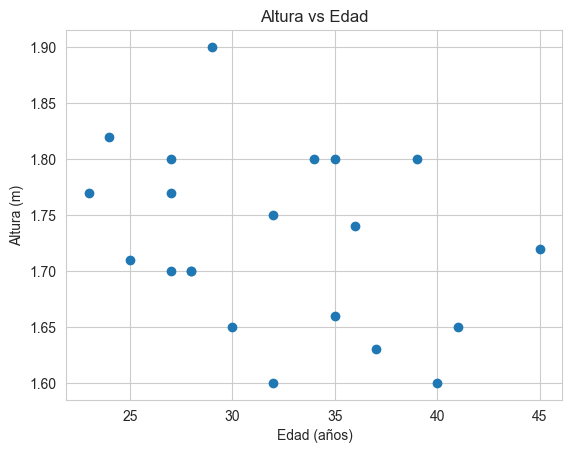

In [9]:
plt.scatter(df["Edad"], df["Altura"])
plt.xlabel("Edad (años)")
plt.ylabel("Altura (m)")
plt.title("Altura vs Edad")
plt.grid(True)
plt.show()

<Axes: xlabel='Edad', ylabel='Altura'>

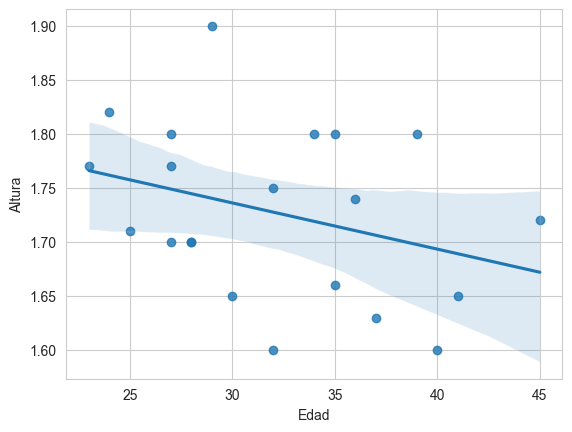

In [16]:
sns.regplot(df, x = "Edad", y = "Altura")

In [ ]:
sns.headmap(df.corr(numeric_only=True))

In [10]:
corr = df["Edad"].corr(df["Altura"])
print("Correlación Edad-Altura:", corr)


Correlación Edad-Altura: -0.3292749795484255


In [17]:
corr = df["Altura"].corr(df["Edad"])
print("Correlación Altura-Edad:", corr)

Correlación Altura-Edad: -0.32927497954842544


No es buena técnica ya que en el gráfico de dispersión al estar los valores tan dispersos entre si, no hay una clara regresión lineal. Además, desde el punto de vista biológico, en adultos la altura no varía de forma lineal con la edad.

### Entrena un modelo de regresión lineal

In [41]:
x = df[["Edad"]]
y = df["Altura"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 11)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16, 1)
(16,)
(5, 1)
(5,)


In [25]:
lm = LinearRegression()
lm.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
pred = lm.predict(x_test)
print(pred)

[1.71878785 1.74763055 1.70725076 1.74474628 1.7332092 ]


### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [46]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.05198902837852097
MAPE: 0.030835745601908084
MSE: 0.0032375303207435495
RMSE: 0.05689929982647897
